# Практическая работа №2

## Импорт необходимых библиотек

In [4]:
import warnings

warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
import pandas as pd

from math import log
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.neighbors import KNeighborsRegressor
from typing import Union
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE

In [7]:
dataframe_train = pd.read_csv("../data/train.csv")
dataframe_test = pd.read_csv("../data/test.csv")
dataframe_train.head(10)

,id,Количество.комнат,Студия,Общая.площадь,Этаж,Этажей.в.доме,Парковка,Без.ремонта,Дизайнерский,Евроремонт,...,Одежда..1000,Супер3кет.1000,Кинотеатр.1000,Кафе.1000,АЗС.1000,Детский.сад.1000,Бар.1000,Банк.1000,Аптека.1000,Цена
0,896,2,0,46.0,3,5,0,0,0,0,...,2,3,0,7,3,13,2,7,18,2350000.0
1,399,2,0,44.6,5,5,0,0,0,0,...,3,5,0,7,3,11,1,4,11,1799000.0
2,1515,2,0,53.0,1,9,0,1,0,0,...,4,11,0,5,3,17,3,7,15,2800000.0
3,1216,2,0,64.0,4,5,0,0,0,1,...,31,5,1,55,2,10,28,32,17,3970000.0
4,677,1,0,33.3,1,10,0,0,1,0,...,1,3,0,2,3,9,0,3,6,1880000.0
5,1210,2,0,46.0,3,4,0,0,0,0,...,38,6,2,15,0,27,9,11,25,2400000.0
6,1485,1,0,45.0,8,9,0,1,0,0,...,8,9,0,8,1,33,4,4,15,2870000.0
7,1557,2,0,54.5,3,14,0,1,0,0,...,11,4,1,12,4,15,2,14,14,2700000.0
8,1482,4,0,86.0,1,10,0,1,0,0,...,16,11,0,9,2,42,12,10,30,3200000.0
9,295,2,0,42.0,2,5,0,0,0,0,...,22,5,0,10,1,13,2,13,17,2560000.0


Выведем информацию о таблицах.

In [8]:
dataframe_train.info()
dataframe_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808 entries, 0 to 807
Data columns (total 48 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         808 non-null    int64  
 1   Количество.комнат          808 non-null    int64  
 2   Студия                     808 non-null    int64  
 3   Общая.площадь              808 non-null    float64
 4   Этаж                       808 non-null    int64  
 5   Этажей.в.доме              808 non-null    int64  
 6   Парковка                   808 non-null    int64  
 7   Без.ремонта                808 non-null    int64  
 8   Дизайнерский               808 non-null    int64  
 9   Евроремонт                 808 non-null    int64  
 10  Косметический              808 non-null    int64  
 11  Балкон                     808 non-null    int64  
 12  Лоджия                     808 non-null    int64  
 13  Совмещенный.санузел        808 non-null    int64  

In [12]:
dataframe_train.isnull().sum()

id                           0
Количество.комнат            0
Студия                       0
Общая.площадь                0
Этаж                         0
Этажей.в.доме                0
Парковка                     0
Без.ремонта                  0
Дизайнерский                 0
Евроремонт                   0
Косметический                0
Балкон                       0
Лоджия                       0
Совмещенный.санузел          0
Раздельный.санузел           0
Лифт                         0
Грузовой.лифт                0
Мусоропровод                 0
Год.постройки                0
Аварийный                    0
Железобетонные.перекрытия    0
Смешанные.перекрытия         0
Деревянные.перекрытия        0
Иные.перекрытия              0
Панельные.стены              0
Блочные.стены                0
Деревянные.стены             0
Кирпичные.стены              0
Монолитные.стены             0
Смешанные.стены              0
Школа.1000                   0
ВУЗ.1000                     0
ТЦ.1000 

In [13]:
dataframe_test.isnull().sum()

id                           0
Количество.комнат            0
Студия                       0
Общая.площадь                0
Этаж                         0
Этажей.в.доме                0
Парковка                     0
Без.ремонта                  0
Дизайнерский                 0
Евроремонт                   0
Косметический                0
Балкон                       0
Лоджия                       0
Совмещенный.санузел          0
Раздельный.санузел           0
Лифт                         0
Грузовой.лифт                0
Мусоропровод                 0
Год.постройки                0
Аварийный                    0
Железобетонные.перекрытия    0
Смешанные.перекрытия         0
Деревянные.перекрытия        0
Иные.перекрытия              0
Панельные.стены              0
Блочные.стены                0
Деревянные.стены             0
Кирпичные.стены              0
Монолитные.стены             0
Смешанные.стены              0
Школа.1000                   0
ВУЗ.1000                     0
ТЦ.1000 

Так как признак id не играет важной роли в предсказании, то можем удалить его из датафреймов.

In [14]:
dataframe_train.drop("id", axis=1, inplace=True)
test_ids = dataframe_test["id"]

Создадим тепловую карту из корреляционной матрицы (Корреляционная матрица - это квадратная таблица, которая показывает коэффициенты корреляции между несколькими переменными. Коэффициент корреляции - это мера линейной связи между двумя переменными, которая может принимать значения от -1 до 1. Корреляционная матрица позволяет видеть закономерности и взаимосвязи между переменными). Тепловая карта - это вид графика, который показывает данные в виде цветных прямоугольных плиток.

AttributeError: QuadMesh.set() got an unexpected keyword argument 'aspect'

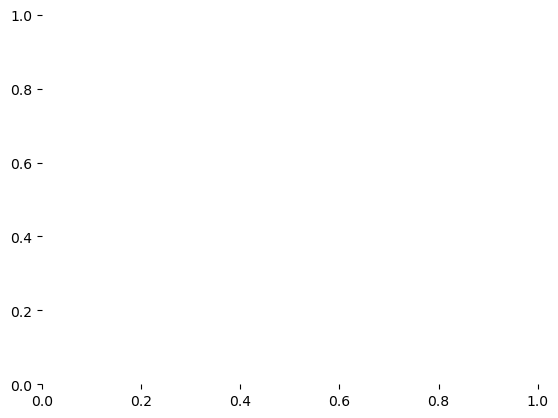

In [17]:
# Создаем тепловую карту с новой цветовой схемой и аргументом aspect
sb.heatmap(dataframe_train.corr(), cmap='coolwarm', linewidths=0.2, fmt='.1g', aspect='auto')

# Добавляем заголовок и подписи осей
plt.title('Корреляция между признаками dataframe_train')
plt.xlabel('Признаки')
plt.ylabel('Признаки')

plt.show()